In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [26]:
raw_data = pd.read_csv('F:\\Muthu_2023\\Personal\\NextStep\\PdM\\Predictive-Maintenance\\Datasets\\train_FD001.csv')
df = raw_data.drop(['Sensor3', 'Sensor4', 'Sensor8','Sensor9', 'Sensor13', 'Sensor19', 'Sensor21', 'Sensor22'], axis=1)
df = df.merge(df[['Engine', 'Cycles']].groupby('Engine').max(), on = 'Engine', how='left')

df = df.rename(columns={"Cycles_x": "Cycles", "Cycles_y": "max_cycles"})

df['Cycle_cat'] = 0
df.loc[(df['max_cycles'] >190) & (df['max_cycles']<245), 'Cycle_cat'] = 1
df.loc[(df['max_cycles'] >=245), 'Cycle_cat'] = 2

In [27]:
df

,Engine,Cycles,Sensor1,Sensor2,Sensor5,Sensor6,Sensor7,Sensor10,Sensor11,Sensor12,...,Sensor15,Sensor16,Sensor17,Sensor18,Sensor20,Sensor23,Sensor24,Remaining Cycles,max_cycles,Cycle_cat
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,...,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,192,1
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,...,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,192,1
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,...,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,192,1
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,...,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,192,1
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,...,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,...,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4,200,1
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,...,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3,200,1
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,...,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2,200,1
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,...,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1,200,1


# Principal Component Analysis (PCA)

In [33]:
# pl = Pipeline([
# ("Scaling", StandardScaler()),
# ("PCA", PCA(10))])    

In [77]:
def PCA_Custom(local_df):
    ss = StandardScaler()
    ss.fit(local_df)
    scaled_df = ss.transform(local_df)
    
    pca = PCA(n_components = 0.95)
    pca.fit(scaled_df)
    pca_df = pca.transform(scaled_df)
    return pca, pca_df

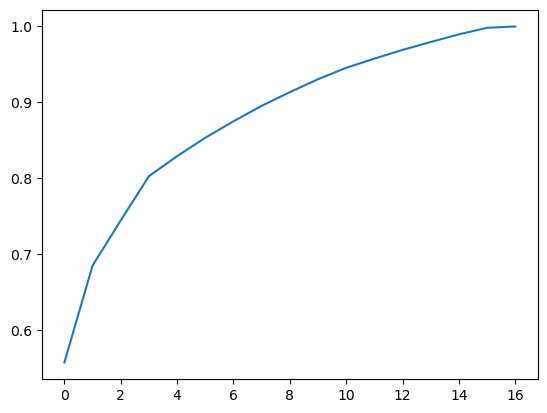

In [48]:
plt.plot(pca.explained_variance_ratio_.cumsum())

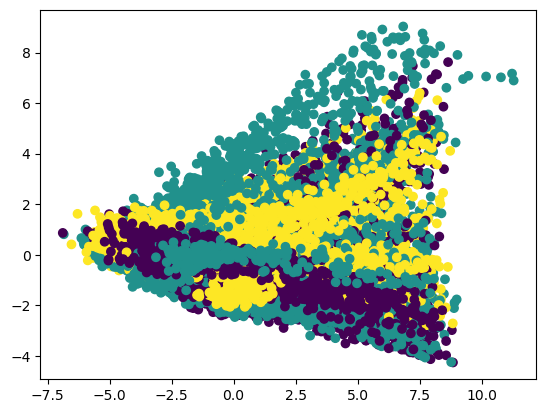

In [59]:
# With Cycles Column
pca_df = PCA_Custom(df.iloc[:, 1:-3])
plt.scatter(pca_df[:,0], pca_df[:,1], c = df['Cycle_cat'])

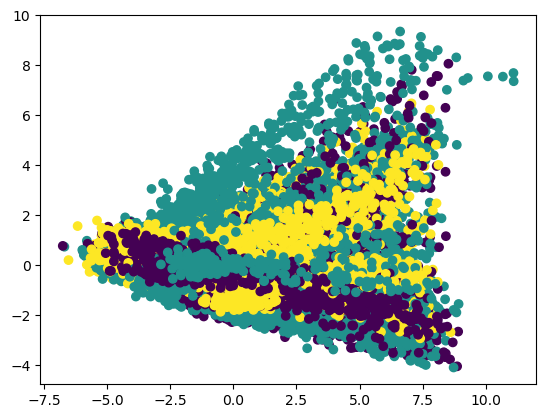

In [60]:
# Without Cycles Column
pca_df = PCA_Custom(df.iloc[:, 2:-3])
plt.scatter(pca_df[:,0], pca_df[:,1], c = df['Cycle_cat'])

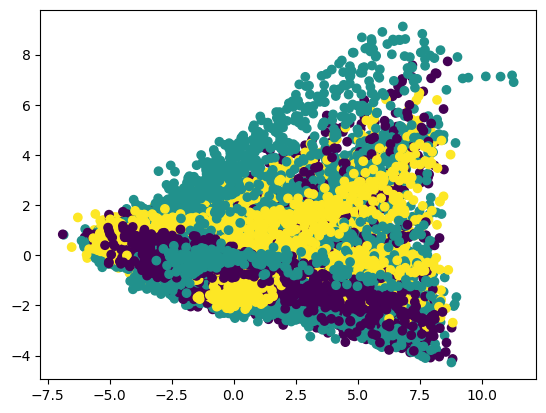

In [78]:
# With Engine and Cycles Column
pca, pca_df = PCA_Custom(df.iloc[:, :-3])
plt.scatter(pca_df[:,0], pca_df[:,1], c = df['Cycle_cat'])

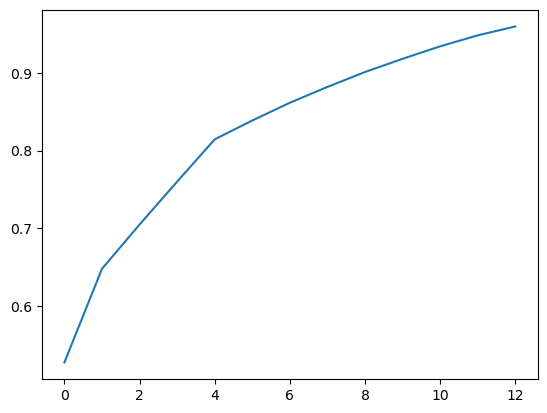

In [79]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [80]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.iloc[:, :-3].columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [81]:
most_important_names

['Sensor14',
 'Sensor17',
 'Sensor1',
 'Sensor2',
 'Sensor1',
 'Cycles',
 'Sensor6',
 'Sensor20',
 'Sensor5',
 'Sensor24',
 'Sensor18',
 'Sensor18',
 'Sensor10']

In [69]:
initial_feature_names

Index(['Engine', 'Cycles', 'Sensor1', 'Sensor2', 'Sensor5', 'Sensor6',
       'Sensor7', 'Sensor10', 'Sensor11', 'Sensor12', 'Sensor14', 'Sensor15',
       'Sensor16', 'Sensor17', 'Sensor18', 'Sensor20', 'Sensor23', 'Sensor24'],
      dtype='object')

In [71]:
most_important

[10, 13, 2, 3, 2, 1, 5, 15, 4, 17, 14, 14, 7, 6, 11, 12, 10, 9]

In [75]:
pca.components_[0].argmax()

array([ 0.01083162,  0.23353414,  0.0020489 ,  0.00513169,  0.26559767,
        0.25352325,  0.29314701, -0.28972281,  0.27092674,  0.11005254,
        0.30078555, -0.29563493,  0.2706187 ,  0.07191081,  0.27926657,
        0.26246091, -0.27516642, -0.27611727])

# Engine wise analysis

In [99]:
pca_df = pd.DataFrame(pcadf)


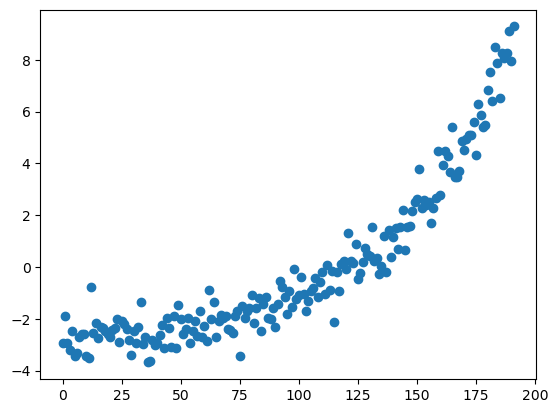

In [103]:
plt.scatter(np.arange(len(pca_df)), pca_df.iloc[:,0])

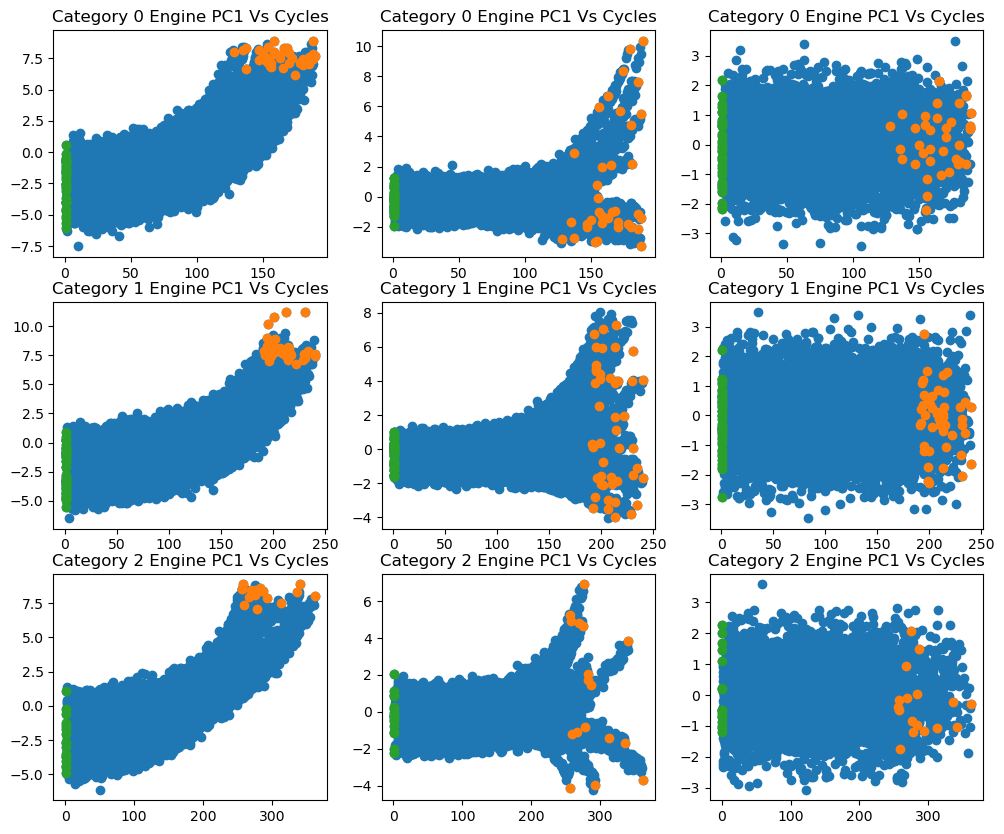

In [136]:
fig, ax = plt.subplots(3,3, figsize=(12,10))
for i in range(3):
    df_local = df[df['Cycle_cat'] == i]
    df_local.reset_index(inplace=True)
    max_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmax()['Cycles'])
    min_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmin()['Cycles'])

    pca, pcadf = PCA_Custom(df_local.iloc[:, 3:-3])
    pca_df = pd.DataFrame(pcadf)
    pca_df['Cycles'] = df_local['Cycles']
    max_df = pca_df.loc[max_pt]
    min_df = pca_df.loc[min_pt]

    ax[i, 0].scatter(pca_df['Cycles'], pca_df.iloc[:,0])
    ax[i, 0].scatter(max_df['Cycles'], max_df.iloc[:,0])
    ax[i, 0].scatter(min_df['Cycles'], min_df.iloc[:,0])
    ax[i, 0].set_title('Category ' + str(i) + ' Engine PC1 Vs Cycles')
    
    ax[i, 1].scatter(pca_df['Cycles'], pca_df.iloc[:,1])
    ax[i, 1].scatter(max_df['Cycles'], max_df.iloc[:,1])
    ax[i, 1].scatter(min_df['Cycles'], min_df.iloc[:,1])
    ax[i, 1].set_title('Category ' + str(i) + ' Engine PC1 Vs Cycles')

    ax[i, 2].scatter(pca_df['Cycles'], pca_df.iloc[:,2])
    ax[i, 2].scatter(max_df['Cycles'], max_df.iloc[:,2])
    ax[i, 2].scatter(min_df['Cycles'], min_df.iloc[:,2])
    ax[i, 2].set_title('Category ' + str(i) + ' Engine PC1 Vs Cycles')

In [134]:
# df.drop(['level_0', 'index'], axis=1, inplace=True)
df

,Engine,Cycles,Sensor1,Sensor2,Sensor5,Sensor6,Sensor7,Sensor10,Sensor11,Sensor12,...,Sensor15,Sensor16,Sensor17,Sensor18,Sensor20,Sensor23,Sensor24,Remaining Cycles,max_cycles,Cycle_cat
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,...,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,192,1
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,...,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,192,1
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,...,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,192,1
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,...,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,192,1
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,...,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,...,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4,200,1
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,...,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3,200,1
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,...,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2,200,1
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,...,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1,200,1


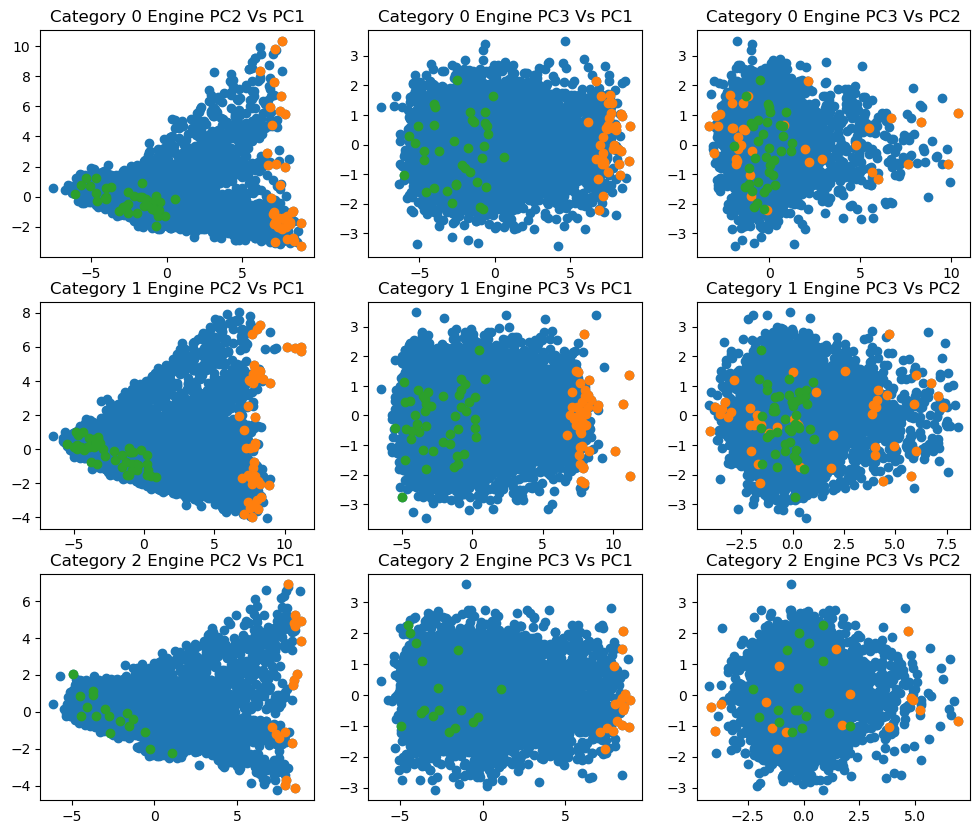

In [135]:
fig, ax = plt.subplots(3,3, figsize=(12,10))
for i in range(3):
    df_local = df[df['Cycle_cat'] == i]
    df_local.reset_index(inplace=True)
    max_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmax()['Cycles'])
    min_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmin()['Cycles'])

    pca, pcadf = PCA_Custom(df_local.iloc[:, 3:-3])
    pca_df = pd.DataFrame(pcadf)
    pca_df['Cycles'] = df_local['Cycles']
    max_df = pca_df.loc[max_pt]
    min_df = pca_df.loc[min_pt]

#     ax[i, 0].scatter(pca_df['Cycles'], pca_df.iloc[:,0])
#     ax[i, 0].scatter(max_df['Cycles'], max_df.iloc[:,0])
#     ax[i, 0].scatter(min_df['Cycles'], min_df.iloc[:,0])

#     ax[i, 1].scatter(pca_df['Cycles'], pca_df.iloc[:,1])
#     ax[i, 1].scatter(max_df['Cycles'], max_df.iloc[:,1])
#     ax[i, 1].scatter(min_df['Cycles'], min_df.iloc[:,1])

#     ax[i, 2].scatter(pca_df['Cycles'], pca_df.iloc[:,2])
#     ax[i, 2].scatter(max_df['Cycles'], max_df.iloc[:,2])
#     ax[i, 2].scatter(min_df['Cycles'], min_df.iloc[:,2])

    
    ax[i, 0].scatter(pca_df.iloc[:,0], pca_df.iloc[:,1])
    ax[i, 0].scatter(max_df.iloc[:,0], max_df.iloc[:,1])
    ax[i, 0].scatter(min_df.iloc[:,0], min_df.iloc[:,1])
    ax[i, 0].set_title('Category ' + str(i) + ' Engine PC2 Vs PC1')
    
    ax[i, 1].scatter(pca_df.iloc[:,0], pca_df.iloc[:,2])
    ax[i, 1].scatter(max_df.iloc[:,0], max_df.iloc[:,2])
    ax[i, 1].scatter(min_df.iloc[:,0], min_df.iloc[:,2])
    ax[i, 1].set_title('Category ' + str(i) + ' Engine PC3 Vs PC1')
    
    ax[i, 2].scatter(pca_df.iloc[:,1], pca_df.iloc[:,2])
    ax[i, 2].scatter(max_df.iloc[:,1], max_df.iloc[:,2])
    ax[i, 2].scatter(min_df.iloc[:,1], min_df.iloc[:,2])
    ax[i, 2].set_title('Category ' + str(i) + ' Engine PC3 Vs PC2')
  

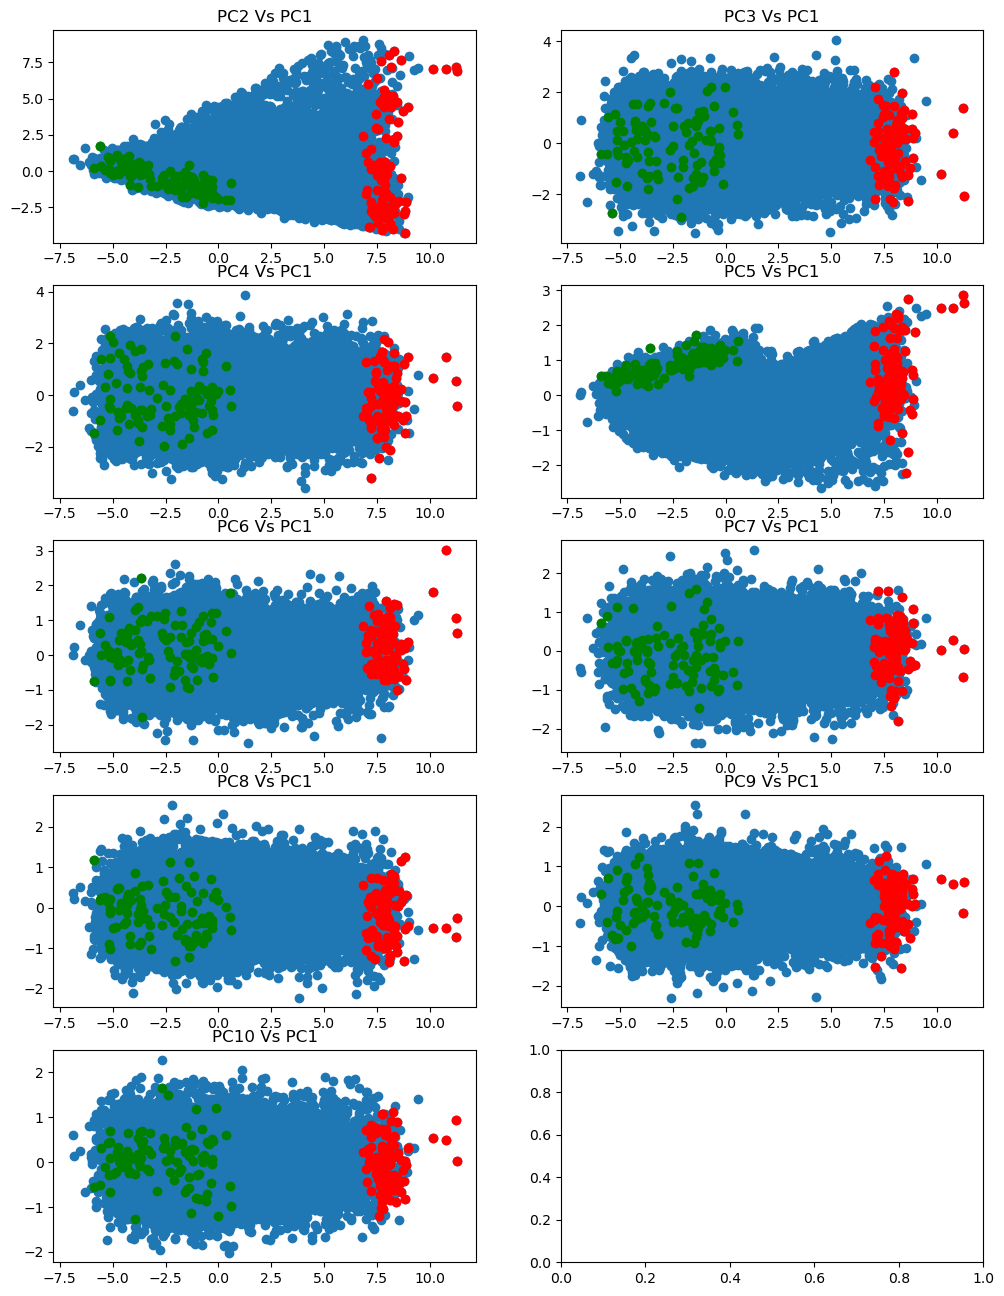

In [129]:
df_local = df
#df_local.reset_index(inplace=True)
max_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmax()['Cycles'])
min_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmin()['Cycles'])

pca, pcadf = PCA_Custom(df_local.iloc[:, 3:-3])
pca_df = pd.DataFrame(pcadf)
pca_df['Cycles'] = df_local['Cycles']
max_df = pca_df.loc[max_pt]
min_df = pca_df.loc[min_pt]
fig, ax = plt.subplots(5,2, figsize=(12,16))
for i in range(9):
    ax[i//2, i%2].scatter(pca_df.iloc[:,0], pca_df.iloc[:,i+1])
    ax[i//2, i%2].scatter(max_df.iloc[:,0], max_df.iloc[:,i+1], color = 'r')
    ax[i//2, i%2].scatter(min_df.iloc[:,0], min_df.iloc[:,i+1], color = 'g')
    ax[i//2, i%2].set_title('PC' + str(i+2) + ' Vs PC1')